# Simple Examples for Using SpecDB (v1.2)

## Examples are with IGMSpec

In [1]:
%matplotlib inline

In [2]:
# import
from astropy import units as u

from specdb import query_catalog as spqcat
from specdb import interface_db as spgidb
from specdb import utils as spdbu
from specdb.specdb import SpecDB

from pyigm.surveys.llssurvey import LLSSurvey

## Setup Class

In [12]:
igmsp = SpecDB(db_file='/Users/lwymarie/Desktop/IGMspec_DB_v02.hdf5')

Using /Users/lwymarie/Desktop/IGMspec_DB_v02.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/IGMspec_DB_v02.hdf5 for the DB file
Available surveys: [u'BOSS_DR12', u'HSTQSO', u'SDSS_DR7', u'KODIAQ_DR1', u'MUSoDLA', u'HD-LLS_DR1', u'2QZ', u'ESI_DLA', u'HDLA100', u'GGG', u'COS-Halos', u'HST_z2', u'COS-Dwarfs', u'XQ-100']
Database is igmspec
Created on 2016-Oct-25


In [4]:
igmsp.qcat

<QueryCatalog:  DB_file=/Users/lwymarie/Desktop/IGMspec_DB_v02.hdf5 with 403265 sources
   Loaded surveys are [u'2QZ', u'BOSS_DR12', u'COS-Dwarfs', u'COS-Halos', u'ESI_DLA', u'GGG', u'HD-LLS_DR1', u'HDLA100', u'HSTQSO', u'HST_z2', u'KODIAQ_DR1', u'MUSoDLA', u'SDSS_DR7', u'XQ-100'] 
>

In [8]:
igmsp.cat.keys()

['sig_zem', 'flag_zem', 'flag_survey', 'zem', 'RA', 'DEC', 'IGM_ID', 'STYPE']

In [5]:
igmsp.idb

<InterfaceDB:  DB_file=/Users/lwymarie/Desktop/IGMspec_DB_v02.hdf5 
   Loaded surveys are [u'BOSS_DR12', u'HSTQSO', u'SDSS_DR7', u'KODIAQ_DR1', u'MUSoDLA', u'HD-LLS_DR1', u'2QZ', u'ESI_DLA', u'HDLA100', u'GGG', u'COS-Halos', u'HST_z2', u'COS-Dwarfs', u'XQ-100'] 
>

In [6]:
meta = igmsp.grab_meta('ESI_DLA')

In [7]:
meta

<Table length=87>
   Name        RA        DEC     Plate ... SURVEY_ID TELESCOPE INSTR GRATING
  str10     float64    float64   int64 ...   int64      str6    str3   str3 
---------- --------- ----------- ----- ... --------- --------- ----- -------
J0007+0041 1.9548678   0.6887808  4217 ...         0    KeckII   ESI     ECH
J0040-0915  10.22772  -9.2574555   655 ...         1    KeckII   ESI     ECH
J0054-0109 13.589279  -1.1560305  4224 ...         2    KeckII   ESI     ECH
J0210-0018 32.679825 -0.30508195   702 ...         3    KeckII   ESI     ECH
J0231-0728 37.906872  -7.4817972  4389 ...         4    KeckII   ESI     ECH
J0331-0741 52.831949  -7.6953078   461 ...         5    KeckII   ESI     ECH
J0747+4434 116.95726   44.571401  3676 ...         6    KeckII   ESI     ECH
J0756+4104 119.07558   41.069061  3680 ...         7    KeckII   ESI     ECH
J0759+1800 119.78158   18.015197  4490 ...         8    KeckII   ESI     ECH
J0813+3508 123.38885   35.136299  3757 ...         9    KeckII   ESI     ECH
       ...       ...         ...   ... ...       ...       ...   ...     ...
J1626+2751 246.61042    27.85903  5005 ...        77    KeckII   ESI     ECH
J1626+2858 246.62167   28.982655  5007 ...        78    KeckII   ESI     ECH
J1654+2227 253.65356   22.459393  4178 ...        79    KeckII   ESI     ECH
J1659+2709  254.7588   27.159754  1692 ...        80    KeckII   ESI     ECH
J1737+5828 264.43696   58.474875   366 ...        81    KeckII   ESI     ECH
J2216+0013 334.18341  0.23003121  4200 ...        82    KeckII   ESI     ECH
J2220-0101 335.07706   -1.029695  4201 ...        83    KeckII   ESI     ECH
J2228-0757 337.18811  -7.9653607   721 ...        84    KeckII   ESI     ECH
J2252+1425 343.19349   14.423851  5040 ...        85    KeckII   ESI     ECH
J2312+0100 348.06853   1.0142906  4209 ...        86    KeckII   ESI     ECH

## Radial search

### Search around FJ0812+32

In [8]:
ids0812 = igmsp.radial_search(('00:40:54.7','-09:15:27'), 1.*u.arcsec)
igmsp.show_cat(ids0812)

Your search yielded 1 match[es]
IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem  STYPE
------ -------- -------- ------ ----------- ------- ---------- -----
303533  10.2277  -9.2574  4.976       662.0   0.000              QSO
----------
Survey key:
    2QZ: 256
    BOSS_DR12: 1
    COS-Halos: 1024
    ESI_DLA: 512
    GGG: 16
    HD-LLS_DR1: 8
    HDLA100: 128
    HSTQSO: 4096
    HST_z2: 32
    KODIAQ_DR1: 4
    SDSS_DR7: 2
    XQ-100: 64


In [9]:
# Grab meta
meta0812 = igmsp.grab_meta('ESI_DLA', ids0812, show=True)

In [10]:
meta0812

<Table length=1>
   Name       RA     DEC   Plate  MJD  ... SURVEY_ID TELESCOPE INSTR GRATING
  str10    float64 float64 int64 int64 ...   int64      str6    str3   str3 
---------- ------- ------- ----- ----- ... --------- --------- ----- -------
J0040-0915  10.228  -9.257   655 52162 ...         1    KeckII   ESI     ECH

In [11]:
# Grab spectra
J0812spec, meta = igmsp.grab_spec('ESI_DLA', ids0812)

Staged 1 spectra totalling 0.0008 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:295: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


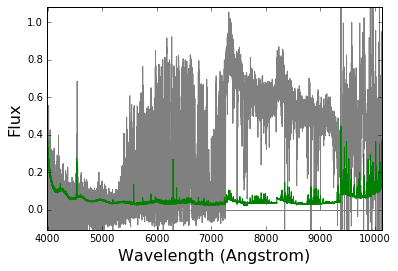

In [12]:
J0812spec.plot()

### Search around J233446.40-090812.3

In [13]:
ids2334 = igmsp.radial_search('J233446.40-090812.3', 1.*u.arcsec)
igmsp.show_cat(ids2334)

Your search yielded 1 match[es]
IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem  STYPE
------ -------- -------- ------ ----------- ------- ---------- -----
381590 353.6933  -9.1367  3.317        14.0   0.000              QSO
----------
Survey key:
    2QZ: 256
    BOSS_DR12: 1
    COS-Halos: 1024
    ESI_DLA: 512
    GGG: 16
    HD-LLS_DR1: 8
    HDLA100: 128
    HSTQSO: 4096
    HST_z2: 32
    KODIAQ_DR1: 4
    SDSS_DR7: 2
    XQ-100: 64


In [14]:
# Grab meta
meta2334 = igmsp.grab_meta('HD-LLS_DR1', ids2334, show=True)

In [15]:
meta2334

<Table length=3>
               Name                    QSO          RA   ... INSTR   TELESCOPE  
              str33                   str19      float64 ...  str5     str13    
--------------------------------- -------------- ------- ... ----- -------------
HD-LLS_J233446.40-090812.3_z3.226 SDSSJ2334-0908 353.693 ...   ESI       Keck-II
HD-LLS_J233446.40-090812.3_z3.226 SDSSJ2334-0908 353.693 ... HIRES        Keck-I
HD-LLS_J233446.40-090812.3_z3.226 SDSSJ2334-0908 353.693 ...  MagE Magellan/Clay

In [16]:
# Grab spectra
J2334spec, meta_2334 = igmsp.grab_spec('HD-LLS_DR1', ids2334)

Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


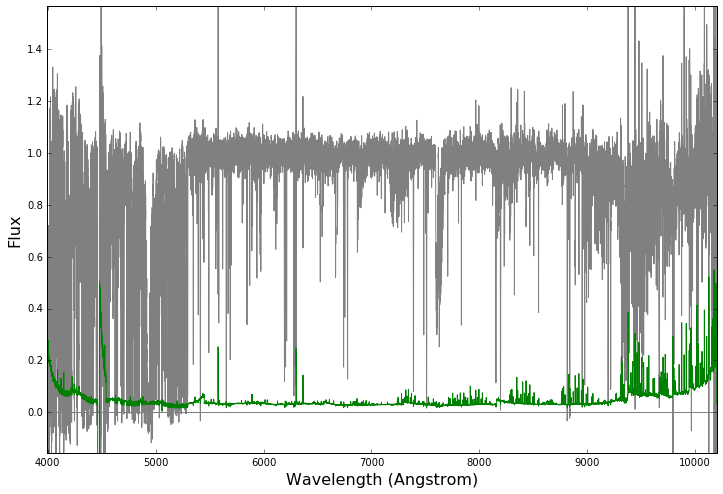

In [17]:
# Plot the first one (ESI)
J2334spec.plot(inline=True)

----

## Simple catalog search

### LLS from SDSS_DR7 vs. IGMspec

In [18]:
sdss_dr7_all = LLSSurvey.load_SDSS_DR7(sample='all')
sdss_dr7_all

SDSS-DR7: Loading LLS file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz


<IGMSurvey: nsys=1935, type=LLS, ref=SDSS-DR7, nsightlines=3759>

In [19]:
# Grab the coord
lls_coord = sdss_dr7_all.coord
lls_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(339.61320833, 13.90905556), (160.36441667, 2.65569444),
     (167.247, 3.19108333), ..., (230.02470833, 23.66472222),
     (124.528625, 7.32227778), (150.86345833, 22.97005556)]>

In [20]:
# Match
lls_ids = igmsp.match_coord(lls_coord)

Your search yielded 1778 matches


In [21]:
# Show cat
igmsp.show_cat(lls_ids)

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem  STYPE
------ -------- -------- ------ ----------- ------- ---------- -----
   881   0.7514  16.0077  3.662         3.0   0.002  BOSS_PCA    QSO
   897   0.7640 -10.8641  3.638         3.0   0.001  BOSS_PCA    QSO
  1680   1.4016  13.9971  3.709         3.0   0.002  BOSS_PCA    QSO
  2168   1.8785  16.1257  3.519         3.0   0.002  BOSS_PCA    QSO
  3247   2.8135  14.7672  4.986        19.0   0.003  BOSS_PCA    QSO
  5191   4.5579  14.4155  4.216         3.0   0.001  BOSS_PCA    QSO
  5224   4.5863  14.3143  3.938         3.0   0.004  BOSS_PCA    QSO
  5481   4.8268  15.1032  4.145         3.0   0.003  BOSS_PCA    QSO
  5616   4.9586  -0.6780  4.319         3.0   0.010  BOSS_PCA    QSO
  5986   5.3335  15.8571  3.690         3.0   0.001  BOSS_PCA    QSO
   ...      ...      ...    ...         ...     ...        ...   ...
378846 326.8571  -8.6430  4.588        18.0   0.000              QSO
379101 329.9334  -8.2762  3.755   

In [22]:
# Grab GGG spec
LLSspec, LLSmeta = igmsp.grab_spec('GGG', lls_ids)

Staged 172 spectra totalling 0.0044032 Gb
Loaded spectra


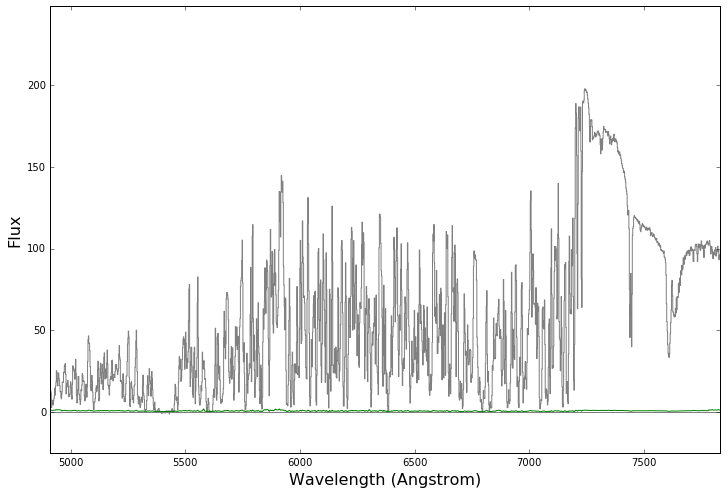

In [23]:
# Show the first spectrum
LLSspec.plot(inline=True)

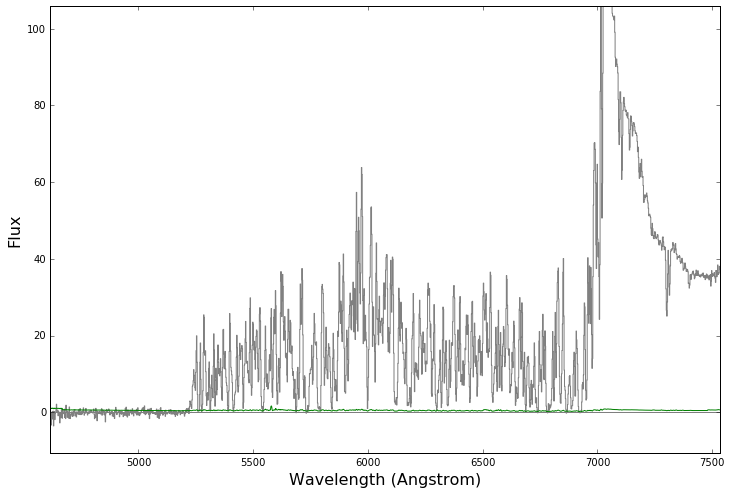

In [24]:
# Show the 10th spectrum
LLSspec.select=9
LLSspec.plot(inline=True)

----

## Time Evolution

In [25]:
ggg_kodiaq = igmsp.cat['flag_survey'] == 18

In [26]:
ids_time = igmsp.cat['IGM_ID'][ggg_kodiaq]
igmsp.show_cat(ids_time)

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem  STYPE
------ -------- -------- ------ ----------- ------- ---------- -----
304948  21.2893 -10.7169  4.492        18.0   0.000              QSO
309121  54.6221   0.3656  5.032        18.0   0.000              QSO
338588 170.7229   0.8916  4.551        18.0   0.000              QSO
355451 205.4227  46.1862  5.023        18.0   0.000              QSO
359993 215.4374  35.2210  4.556        18.0   0.000              QSO
363388 222.7831   2.9377  4.481        18.0   0.000              QSO
370455 238.1793  25.8748  4.667        18.0   0.000              QSO
372893 244.0921   5.0244  4.872        18.0   0.000              QSO
377943 314.3506  -0.5052  4.663        18.0   0.000              QSO
378846 326.8571  -8.6430  4.588        18.0   0.000              QSO
----------
Survey key:
    2QZ: 256
    BOSS_DR12: 1
    COS-Halos: 1024
    ESI_DLA: 512
    GGG: 16
    HD-LLS_DR1: 8
    HDLA100: 128
    HSTQSO: 4096
    HST_z2: 32
   

In [27]:
meta = igmsp.grab_meta(['GGG','KODIAQ_DR1'], ids_time)

In [28]:
spec_time, meta_time = igmsp.grab_spec(['GGG','SDSS_DR7'], ids_time)

Staged 20 spectra totalling 0.000512 Gb
Loaded spectra
Staged 10 spectra totalling 0.00064 Gb
Loaded spectra


In [29]:
spec_time

[<XSpectrum1D: file=none, nspec=20, select=0, wvmin=4335.6 Angstrom, wvmax=7242.52 Angstrom>,
 <XSpectrum1D: file=none, nspec=10, select=0, wvmin=3800.14 Angstrom, wvmax=9206.62 Angstrom>]

### Plot both

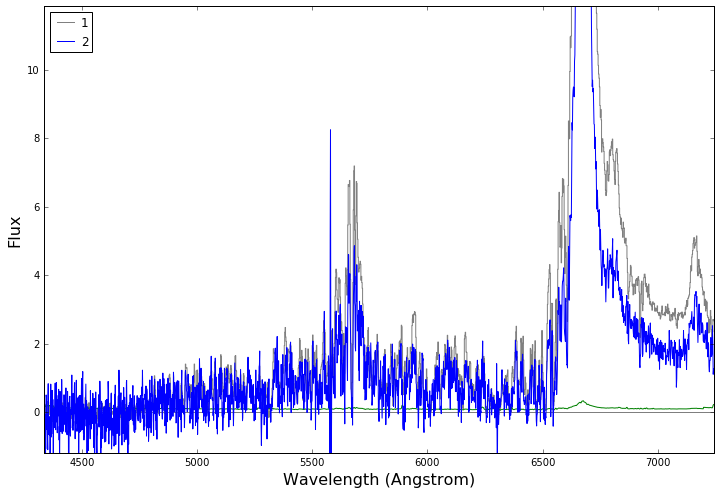

In [30]:
spec_time[0].plot(plot_two=spec_time[1],inline=True, scale_two=0.6)

----

## Pairs

### QPQ8 like

#### Query on separation (angular and redshift)

In [31]:
ID_fg, ID_bg = igmsp.pairs(30*u.arcsec, 3000.*u.km/u.s)

In [32]:
igmsp.show_cat(ID_fg)

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem STYPE
------ -------- -------- ------ ----------- ------- --------- -----
   293   0.2461  28.3758  0.985         1.0  -1.000 BOSS_PCA    QSO
   434   0.3669   8.6782  2.794         1.0   0.003 BOSS_PCA    QSO
   851   0.7280  21.6517  1.877         1.0  -1.000 BOSS_PCA    QSO
  1006   0.8555  13.4381  0.628         1.0  -1.000 BOSS_PCA    QSO
  1638   1.3680  25.7650  2.545         1.0  -1.000 BOSS_PCA    QSO
  2490   2.1692  17.1640  1.380         1.0  -1.000 BOSS_PCA    QSO
  2748   2.3791  17.4591  0.665         1.0  -1.000 BOSS_PCA    QSO
  2830   2.4458  12.0703  2.254         1.0   0.002 BOSS_PCA    QSO
  2872   2.4857  26.2747  1.997         1.0   0.001 BOSS_PCA    QSO
  2940   2.5424  32.9975  2.043         1.0  -1.000 BOSS_PCA    QSO
   ...      ...      ...    ...         ...     ...       ...   ...
402176 341.2155 -29.8783  0.310       256.0   0.000       2QZ   QSO
402377 342.5932 -29.6568  0.596       256.0   0.

#### Check for high dispersion spectrum in b/g QSOs

In [33]:
highdisp = igmsp.cutid_on_surveys(['HD-LLS_DR1', 'KODIAQ_DR1'], ID_bg)

In [34]:
igmsp.show_cat(ID_bg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem STYPE
------ -------- -------- ------ ----------- ------- -------- -----
382393  73.0567 -16.6700  2.684         4.0   0.000   SIMBAD   QSO
----------
Survey key:
    2QZ: 256
    BOSS_DR12: 1
    COS-Halos: 1024
    ESI_DLA: 512
    GGG: 16
    HD-LLS_DR1: 8
    HDLA100: 128
    HSTQSO: 4096
    HST_z2: 32
    KODIAQ_DR1: 4
    SDSS_DR7: 2
    XQ-100: 64


In [35]:
igmsp.show_cat(ID_fg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem STYPE
------ -------- -------- ------ ----------- ------- -------- -----
382577  73.0593 -16.6713  2.600      4096.0   0.000    UNKWN   QSO
----------
Survey key:
    2QZ: 256
    BOSS_DR12: 1
    COS-Halos: 1024
    ESI_DLA: 512
    GGG: 16
    HD-LLS_DR1: 8
    HDLA100: 128
    HSTQSO: 4096
    HST_z2: 32
    KODIAQ_DR1: 4
    SDSS_DR7: 2
    XQ-100: 64


In [3]:
qpq_fil = '/Users/lwymarie/Desktop/qpq_optical.hdf5'

In [4]:
qpqsp = SpecDB(db_file=qpq_fil,idkey='PRIV_ID')

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11


In [5]:
spec,meta = qpqsp.spec_from_coord('100247.14+002053.0',private=True)

Your search yielded 4 match[es]


/Users/lwymarie/python/specdb/specdb/specdb.py:92: UserWarning: Found multiple sources.  Hope you expected that.
  warnings.warn("Found multiple sources.  Hope you expected that.")
/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:297: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


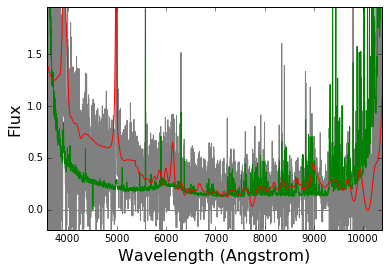

In [6]:
spec[0].plot()